## Notebook to visualize TSP Lib instances

In [1]:
#!pwsh
Push-Location
# build projects
cd ../../Anpcp.Core
dotnet build
Pop-Location

MSBuild version 17.9.6+a4ecab324 for .NET
  Determining projects to restore...
  All projects are up-to-date for restore.
  Anpcp.Core -> C:\Users\netoo\local-personal\repos\alpha-neighbor-p-center-problem\src\Anpcp.Core\bin\Debug\net8.0\Anpcp.Core.dll

Build succeeded.
    0 Warning(s)
    0 Error(s)

Time Elapsed 00:00:02.13


In [2]:
#!csharp
#r "nuget:ScottPlot, 5.0.39"
#r "..\..\Anpcp.Core\bin\Debug\net8.0\Anpcp.Core.dll"

Installed Packages ScottPlot, 5.0.39

Loading extensions from `C:\Users\netoo\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [3]:
// Setup a custom formatter to display plots as images
using ScottPlot;
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(Plot),
    (p, w) => w.Write(
        ((Plot)p).GetImageHtml(800, 500)),
    HtmlFormatter.MimeType);

In [4]:
using Anpcp.Core.IO;

var filePath = @"..\..\..\data\tsplib\pla85900.tsp";

var nodes = TspFileIO.ReadNodes(filePath);


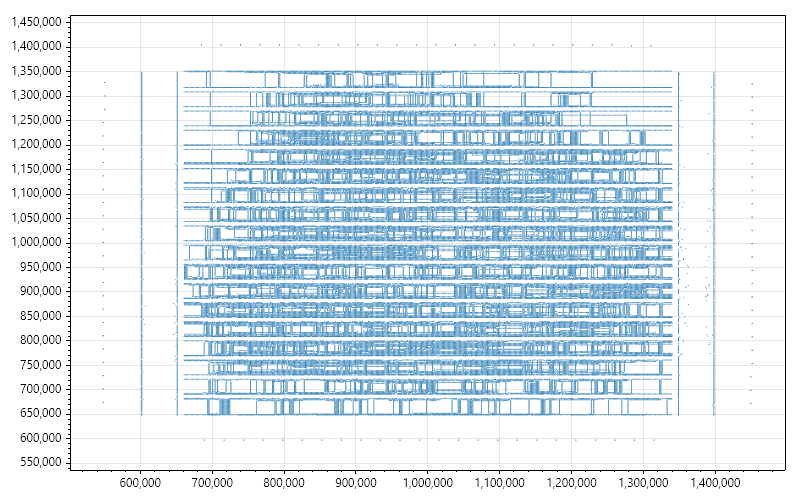

In [14]:
var plotter = new Plot
{
    // ScaleFactor = 0.5
};

var markers = plotter.Add.Markers(
    nodes.Select(v => (double)v.XCoord).ToArray(),
    nodes.Select(v => (double)v.YCoord).ToArray());

markers.MarkerStyle.Size = 1;

plotter